>NOTE: this discussion should follow introduction to measures of central tendency, at least median and mean should have been introduced.

#  Variation/variability in descriptive statistics

Using descriptive statistics, you can report characteristics of your data:

 - The distribution concerns the frequency of each value.
 - The central tendency concerns the averages of the values.
 - The variability concerns how spread out the values are.

## Motivating example

In [405]:
import numpy as np
a_one = np.array([-6, 0, 4, 6, 6, 14])
a_two = np.array([-1, 0, 4, 6, 6, 9])

print("Condsider two arrays: ", a_one, a_two)
print("Comparing the means: ", a_one.mean(), a_two.mean())
print("Comparing the medians: ", np.median(a_one), np.median(a_two))

Condsider two arrays:  [-6  0  4  6  6 14] [-1  0  4  6  6  9]
Comparing the means:  4.0 4.0
Comparing the medians:  5.0 5.0


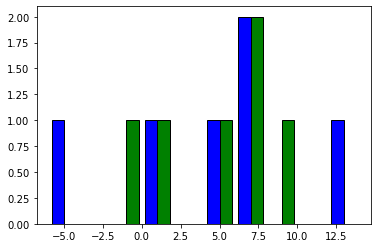

In [406]:
import matplotlib.pyplot as plt
plt.hist([a_one, a_two], histtype='bar', color = ('blue', 'green'), edgecolor = 'black', cumulative=0)
plt.show()

## Why measuring variation is so important?

Weather forecast example. Flood in one area but drought in the other. On average all looks fine, but the problem is in the tails of distribution.

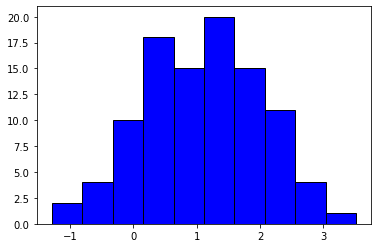

In [407]:
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt

X_1, y = make_blobs(n_samples=100, centers=1, n_features=1, random_state=0)
plt.hist(X_1, color = 'blue', edgecolor = 'black')

plt.show()

## Four big ideas

Today let's focus on **variation** (amount of dispersion in the dataset). As you already know there are multiple measures of central tendency. Similarly, there are multiple measures of dispersion:
 - Range (max - min)
 - Interquartile Range (IQR), i.e Q3 - Q1 or 75th percentile - 25th percentile
 - Variance, i.e sum of squared differences
 - Standard deviation to get back original units
 

### Range

While is is very easy to understand, it is not always good because it can be influenced by outliers.

when you draw random samples from the same population, the range tends to increase as the sample size increases. Consequently, use the range to compare variability only when the sample sizes are similar.

In [409]:
print("Range of the first array: ", max(a_one) - min(a_one))
print("Range of the second array: ", max(a_two) - min(a_two))

Range of the first array:  20
Range of the second array:  10


### Function to compute range

Steps:
1. Sort the input array
2. Locate the largest value
3. Subtract the smallest value 
4. Report the difference

In [440]:
def compute_range(X):
    X_max = sorted(X)[-1]
    X_min = sorted(X)[0]
    diff = X_max - X_min
    return diff
    

In [442]:
compute_range(X_1)

array([4.81352898])

Create another array X_2 by introducing a new large observation, compare means and ranges:

In [447]:
X_2 = X_1.copy()
X_2[0][0] = 5
print('Original mean {} and shifted mean {}'.format(X_1.mean(), X_2.mean()))

Original mean 1.110102196019141 and shifted mean 1.1540047346432072


Use `compute_range()` function to check how different the variation really is:

In [450]:
print("Range of the first blob: ", compute_range(X_1))
print("Range of the second blob: ", compute_range(X_2))

Range of the first blob:  [4.81352898]
Range of the second blob:  [6.29205812]


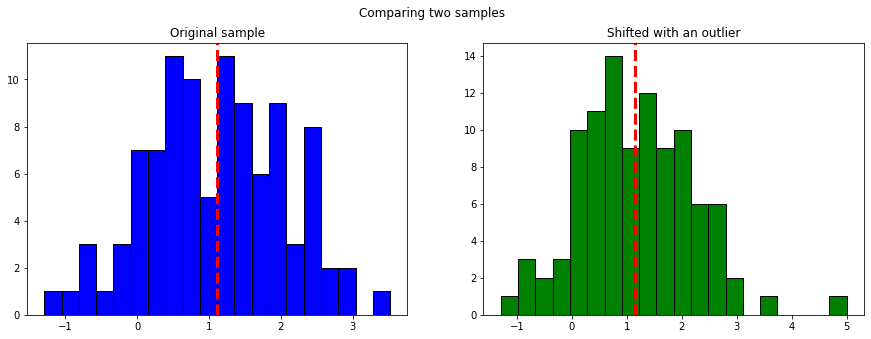

In [451]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.hist(X_1, color = 'blue', edgecolor = 'black', bins=20)
plt.axvline(X_1.mean(), color='r', linestyle='dashed', linewidth=3)
plt.title("Original sample")

plt.subplot(1, 2, 2)
plt.hist(X_2, color = 'green', edgecolor = 'black', bins=20)
plt.axvline(X_2.mean(), color='r', linestyle='dashed', linewidth=3)

plt.title("Shifted with an outlier")

plt.suptitle("Comparing two samples")
plt.show()

### Interquartile Range (IQR)

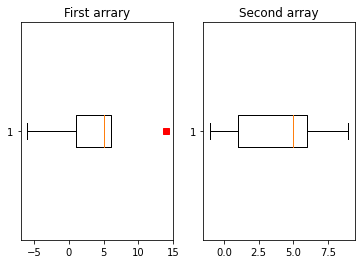

In [413]:
fig, axs = plt.subplots(1, 2)

# basic plot
axs[0].boxplot(a_one, 0, 'rs', 0)
axs[0].set_title('First arrary')

# notched plot
axs[1].boxplot(a_two, 0, 'rs', 0)
axs[1].set_title('Second array')

plt.show()

As median spits sample in half or 50%, do median again on both halves and this operation will give you Q1 and Q2 of the first half and Q3 and Q4 for the second half. Now, drop the bottom (Q1) and the top (Q4), i.e. focus on the center (Q2+Q3).

Again, similar to median, this measure works well on heavily skewed distributions. 

Note, one can use other percentiles to define custom cut off points. For example 90th and 10th range will focus on the middle 80% of observations. 

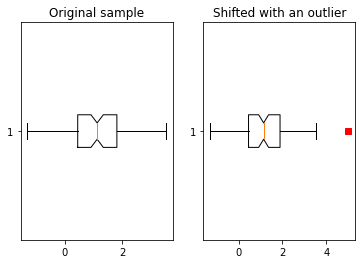

In [415]:
fig, axs = plt.subplots(1, 2)

axs[0].boxplot(X_1, 1, 'rs', 0)
axs[0].set_title('Original sample')

axs[1].boxplot(X_2, 1, 'rs', 0)
axs[1].set_title('Shifted with an outlier')

plt.show()

### Function to compute IQR

Steps:
1. Get the length on the input array
2. Calculate what the value of percentile is given the length
3. Sort the data and slice required percentile
4. Return the slice

In [560]:
def compute_iqr(X, percentile):
    input_length = len(X)
    lower_boundary = input_length * min(percentile)
    upper_boundary = input_length * max(percentile)
    selected_slice =  sorted(X)[int(lower_boundary):int(upper_boundary)]
    return selected_slice

In [562]:
test_array = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
compute_iqr(test_array, (0.1, 0.8))

[1, 2, 3, 4, 5, 6, 7]

### Variance

This is simply squared difference from the mean averaged by the number of observations.

Steps:
1. Compute average of all observations
2. Compute difference from the average
3. Square the differences
4. Sum up all squared differences
5. Divide by the number of observations




In [597]:
def compute_variance(X):
    diff_sum = 0
    for i in range(len(X)):
        diff_squared = (X.mean() - X[i])**2
        diff_sum = diff_sum + diff_squared
    variance = diff_sum / len(X)
    return variance

In [596]:
compute_variance(X_1)

array([0.90465842])

In [587]:
np.var(X_1)

0.9046584165998773

### Standard deviation

Same as variance but "standardized" - simply take the square root of the variance to go back to original units, i.e pounds or gallons.

In [599]:
std = (compute_variance(X_1))**(1/2)
std

array([0.95113533])

In [600]:
np.std(X_1)

0.9511353303289061

### Special case of Normal Distribution

The Empirical Rule for the Standard Deviation of a Normal Distribution:

## When to use what?

1. **Range** is good for small and similar samples, be aware of outliers
2. **IQR** is good for skewed distributions
3. **Standard deviation** is a square root of **variance**
4. Note **absolute** and **relative** measures of variability 

## Note on statistical significance


A 95% confidence interval means that if you repeat your study with a new sample in exactly the same way 100 times, you can expect your estimate to lie within the specified range of values 95 times.

## Examples

Examples from finance:
- Downside deviation (https://www.investopedia.com/terms/d/downside-deviation.asp)
- Coefficient of Variation (Std / Mean), aka Relative Standard Deviation, dispersion of observations around the mean.This is a unit-free statistic and one where the higher the value the greater the dispersion. This is important for comparing prices for example (std / mean).
- The Sharpe ratio indicates how well an equity investment is performing compared to a risk-free investment, taking into consideration the additional risk level involved with holding the equity investment. 
- The Sortino ratio is a variation of the Sharpe ratio that only factors in downside risk.(https://www.investopedia.com/ask/answers/010815/what-difference-between-sharpe-ratio-and-sortino-ratio.asp)

 > NOTE: coming next should probably be measures of **Co-Variance**, i.e. correlation.
 Pearson Correlation Coefficient
Linear Correlation Coefficient
Sample Correlation Coefficient
Population Correlation Coefficient